### Step 1. Prepare the dataset

For this analysis, we will start with the preprocessed dataset "item-genre-spec.csv". This dataset has all the categorical values, hence usual clustering algorithms like K Means are not applicable in this scenario as it works better for continuous variables.

In [121]:
import pandas as pd
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
items_df = pd.read_csv("/Users/akshay/sjsu-cmpe-256-group-project/experiment3/item-genre-spec.csv", sep=",")

items_df.head()

,item_id,publisher,developer,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,...,spec_steam_workshop,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards
0,761140,Kotoshiro,Kotoshiro,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,643980,"Making Fun, Inc.",Secret Level SRL,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,670290,Poolians.com,Poolians.com,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,767400,u5f7cu5cb8u9886u57df,u5f7cu5cb8u9886u57df,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,772540,Trickjump Games Ltd,Trickjump Games Ltd,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [123]:
len(items_df['developer'].unique())

10234

In [124]:
len(items_df['publisher'].unique())

7706

As we can see, the distinct values for developer and publisher are quite high and all other columns are binary categorical features. Since this won't add value to the analysis, we will remove those features

In [125]:
items_df.drop(['item_id', 'developer', 'publisher'], axis=1, inplace=True)

In [126]:
items_df.shape

(29941, 53)

In [127]:
items_df.head()

,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,genre_free_to_play,genre_indie,genre_utilities,...,spec_steam_workshop,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


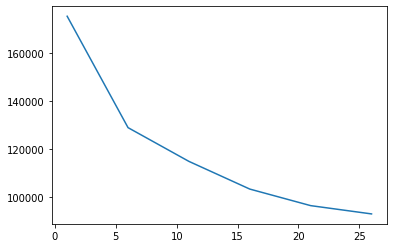

In [128]:
clustering_costs_huang = []
for i in list(range(1,30,5)):
    kmode = KModes(n_clusters=i, init = "Huang", verbose=1, n_jobs=-1)
    kmode.fit_predict(items_df)
    clustering_costs_huang.append(kmode.cost_)
    
y = np.array([i for i in range(1,30,5)])
plt.plot(y,clustering_costs_huang)

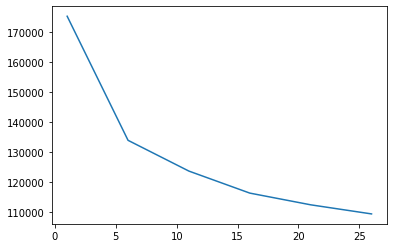

In [129]:
clustering_costs_cao = []
for i in list(range(1,30,5)):
    kmode = KModes(n_clusters=i, init = "Cao", verbose=1, n_jobs=-1)
    kmode.fit_predict(items_df)
    clustering_costs_cao.append(kmode.cost_)
    
y = np.array([i for i in range(1,30,5)])
plt.plot(y,clustering_costs_cao)

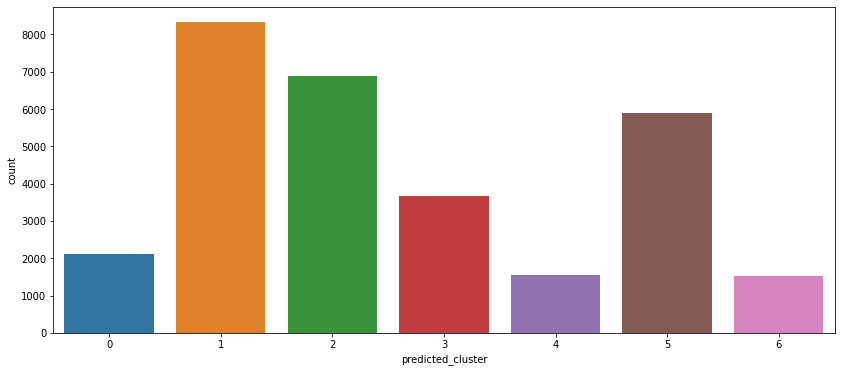

In [137]:
kmodes_model_huang = KModes(n_clusters=7, init = "Huang", verbose=1, n_jobs=-1)
game_clusters_huang = kmodes_model_huang.fit_predict(items_df)
game_clusters_huang_df = pd.DataFrame(game_clusters_huang)
game_clusters_huang_df.columns = ['predicted_cluster']
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="predicted_cluster", data=game_clusters_huang_df)

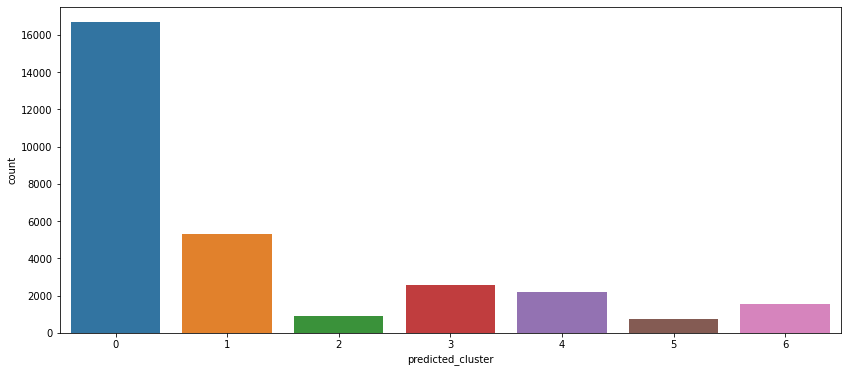

In [138]:
kmodes_model_cao = KModes(n_clusters=7, init = "Cao", verbose=1, n_jobs=-1)
game_clusters_cao = kmodes_model_cao.fit_predict(items_df)
game_clusters_cao_df = pd.DataFrame(game_clusters_cao)
game_clusters_cao_df.columns = ['predicted_cluster']
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="predicted_cluster", data=game_clusters_cao_df)

In [132]:
game_clusters_df = pd.DataFrame(game_clusters_huang)
game_clusters_df.columns = ['predicted_cluster']
combined_df = pd.concat([items_df, game_clusters_df], axis = 1)
combined_df.head(10)

,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,genre_free_to_play,genre_indie,genre_utilities,...,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards,predicted_cluster
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,5
1,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,1
2,0,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
5,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
6,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
7,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
8,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,2
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,5


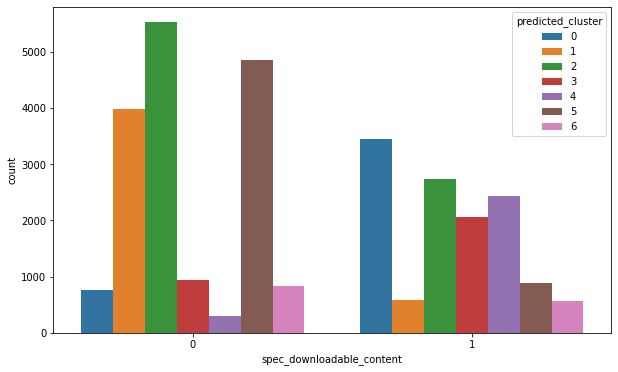

In [136]:
plt.figure(figsize=(10, 6))
sns.countplot(x=combined_df['spec_downloadable_content'],order=combined_df['spec_downloadable_content'].value_counts().index,hue=combined_df['predicted_cluster'])
plt.show()

In [139]:
kmodes_n = kmodes_model_huang.cluster_centroids_
shape = kmodes_n.shape
for i in range(shape[0]):
    print("\ncluster " + str(i) + ": ")
    cent = kmodes_n[i,:]
    for j in items_df.columns[np.nonzero(cent)]:
        print(j)


cluster 0: 
genre_indie
genre_action
spec_full_controller_support
spec_steam_achievements
spec_shared/split_screen
spec_multi-player
spec_single-player
spec_steam_trading_cards

cluster 1: 
genre_indie
spec_steam_cloud
spec_steam_achievements
spec_single-player
spec_steam_trading_cards

cluster 2: 
spec_multi-player
spec_downloadable_content
spec_single-player

cluster 3: 
genre_indie
genre_simulation
spec_steam_achievements
spec_single-player

cluster 4: 
genre_action
spec_steam_cloud
spec_steam_achievements
spec_steam_leaderboards
spec_co-op
spec_multi-player
spec_downloadable_content
spec_single-player

cluster 5: 
spec_single-player

cluster 6: 
genre_action
genre_adventure
spec_full_controller_support
spec_steam_achievements
spec_downloadable_content
spec_single-player
spec_steam_trading_cards


In [140]:
import re
def clean_bundle_data():

    with open("/Users/akshay/Downloads/bundle_data.json", "r") as raw_input:
        with open("/Users/akshay/Downloads/bundle_data_cleaned.json", "w") as cleaned_file:
            try:
                for line in raw_input:
                    withoutSingleQuotes = line.replace('\'', '\"')
                    main_item_name_indexes = [m.start() for m in re.finditer("\"item_name\"", withoutSingleQuotes)]
                    for main_item_name_index in main_item_name_indexes:
                        main_item_name_index = main_item_name_index + 14
                        current_brace_index = withoutSingleQuotes[main_item_name_index:].find("}")
                        temp = withoutSingleQuotes[main_item_name_index: main_item_name_index + current_brace_index - 1]
                        repeatingDoubleQuotesIndexes = [m.start() for m in re.finditer("\"", temp)]
                        for i in repeatingDoubleQuotesIndexes:
                            toReplaceIndex = main_item_name_index + i
                            withoutSingleQuotes = withoutSingleQuotes[:toReplaceIndex] + "'" + withoutSingleQuotes[toReplaceIndex + 1:]


                    main_bundle_name_indexes = [m.start() for m in re.finditer("\"bundle_name\"", withoutSingleQuotes)]
                    for main_bundle_name_index in main_bundle_name_indexes:
                        main_bundle_name_index = main_bundle_name_index + 16
                        current_bid_index = withoutSingleQuotes[main_bundle_name_index:].find("bundle_id")
                        temp = withoutSingleQuotes[main_bundle_name_index: main_bundle_name_index + current_bid_index - 4]
                        repeatingDoubleQuotesIndexes = [m.start() for m in re.finditer("\"", temp)]
                        for i in repeatingDoubleQuotesIndexes:
                            toReplaceIndex = main_bundle_name_index + i
                            withoutSingleQuotes = withoutSingleQuotes[:toReplaceIndex] + "'" + withoutSingleQuotes[toReplaceIndex + 1:]
                    withoutSingleQuotes = withoutSingleQuotes.replace("\\", "")
                    cleaned_file.write(withoutSingleQuotes)
            except:
                pass
if __name__ == "__main__":
    clean_bundle_data()

In [167]:
import json
item_ids = pd.read_csv("/Users/akshay/sjsu-cmpe-256-group-project/experiment3/item-genre-spec.csv", sep=",")["item_id"]
item_with_clusters = pd.concat([item_ids, combined_df], axis = 1)
item_with_clusters.head()

,item_id,genre_strategy,genre_animation_&amp;_modeling,genre_photo_editing,genre_software_training,genre_sports,genre_web_publishing,genre_accounting,genre_free_to_play,genre_indie,...,spec_multi-player,spec_online_co-op,spec_downloadable_content,spec_stats,spec_mods,spec_captions_available,spec_mods_(require_hl1),spec_single-player,spec_steam_trading_cards,predicted_cluster
0,761140,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,5
1,643980,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,1,1
2,670290,0,0,0,0,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,2
3,767400,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,772540,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5


In [185]:
item_found = 0
item_missing = 0
cluster_bundle_match = pd.DataFrame(columns=['match_score'])
import statistics

with open("/Users/akshay/Downloads/bundle_data_cleaned.json", "r") as cleaned_file:
    for line in cleaned_file:
        try:
            json_obj = json.loads(line)
            items = json_obj['items']
            predictions = []
            for item in items:
                item_id = int(item["item_id"])
                if item_id in item_ids.values:
                    item_found = item_found + 1
                    cluster_prediction = int(item_with_clusters.loc[item_with_clusters["item_id"] == item_id]["predicted_cluster"])
                    predictions.append(cluster_prediction)
                else:
                    item_missing = item_missing + 1
            mode = statistics.mode(predictions)
            match_score = float(predictions.count(mode)/len(predictions))*100
            print(predictions, match_score)
            cluster_bundle_match = cluster_bundle_match.append({'match_score': round(match_score)}, ignore_index=True)
        except:
            pass


[1, 1, 2, 1, 1, 5, 5, 5, 5] 44.44444444444444
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 100.0
[2, 2, 2] 100.0
[2, 2, 2] 100.0
[1, 0] 50.0
[1] 100.0
[5, 5] 100.0
[5, 5, 5, 5, 5] 100.0
[1, 1, 1, 5] 75.0
[1, 0] 50.0
[2, 2] 100.0
[1, 1] 100.0
[5, 5, 5, 1, 1, 2] 50.0
[3, 3, 3, 1] 75.0
[1, 3, 3, 1, 1] 60.0
[2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 94.44444444444444
[2, 2, 3] 66.66666666666666
[5, 5] 100.0
[3, 3, 3] 100.0
[5, 3] 50.0
[1, 5, 4, 4, 4, 4, 4, 4, 4] 77.77777777777779
[5, 4, 4, 4, 4, 4, 4, 4] 87.5
[2] 100.0
[3] 100.0
[5, 5, 5] 100.0
[2, 6, 6, 2, 1] 40.0
[3, 5] 50.0
[5, 2] 50.0
[1] 100.0
[1, 1] 100.0
[6, 6] 100.0
[5, 0] 50.0
[1, 1] 100.0
[2, 2, 2] 100.0
[1, 2] 50.0
[5, 1, 5, 1, 1] 60.0
[1, 5, 5] 66.66666666666666
[1, 2] 50.0
[1, 1] 100.0
[2, 0] 50.0
[1, 1, 1, 1] 100.0
[3, 5] 50.0
[2, 2] 100.0
[3, 3] 100.0
[3, 3] 100.0
[5] 100.0
[5] 100.0
[1, 1] 100.0
[1, 1] 100.0
[1, 4, 4, 4] 75.0
[0, 0] 100.0
[5, 3] 50.0
[0, 0] 100.0
[1] 100.0

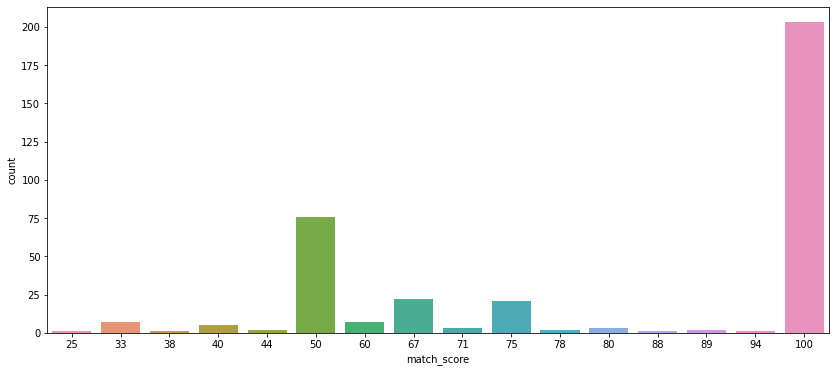

In [186]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="match_score", data=cluster_bundle_match)